<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#基本概念" data-toc-modified-id="基本概念-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>基本概念</a></span></li><li><span><a href="#隐马尔可夫模型的两个基本假设" data-toc-modified-id="隐马尔可夫模型的两个基本假设-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>隐马尔可夫模型的两个基本假设</a></span></li><li><span><a href="#隐马尔可夫链三要素" data-toc-modified-id="隐马尔可夫链三要素-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>隐马尔可夫链三要素</a></span><ul class="toc-item"><li><span><a href="#实际问题理解三要素" data-toc-modified-id="实际问题理解三要素-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>实际问题理解三要素</a></span></li></ul></li><li><span><a href="#隐马尔可夫链三个基本问题" data-toc-modified-id="隐马尔可夫链三个基本问题-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>隐马尔可夫链三个基本问题</a></span></li><li><span><a href="#观测概率计算" data-toc-modified-id="观测概率计算-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>观测概率计算</a></span><ul class="toc-item"><li><span><a href="#直接计算法：（计算量大）" data-toc-modified-id="直接计算法：（计算量大）-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>直接计算法：（计算量大）</a></span></li><li><span><a href="#前向算法" data-toc-modified-id="前向算法-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>前向算法</a></span></li></ul></li><li><span><a href="#参数学习" data-toc-modified-id="参数学习-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>参数学习</a></span></li><li><span><a href="#状态预测" data-toc-modified-id="状态预测-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>状态预测</a></span></li><li><span><a href="#李航习题10.1和python实现" data-toc-modified-id="李航习题10.1和python实现-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>李航习题10.1和python实现</a></span></li><li><span><a href="#李航习题10.2和python实现（自编HMM函数同上）" data-toc-modified-id="李航习题10.2和python实现（自编HMM函数同上）-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>李航习题10.2和python实现（自编HMM函数同上）</a></span></li><li><span><a href="#李航习题10.3和python实现" data-toc-modified-id="李航习题10.3和python实现-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>李航习题10.3和python实现</a></span></li></ul></div>

# 基本概念
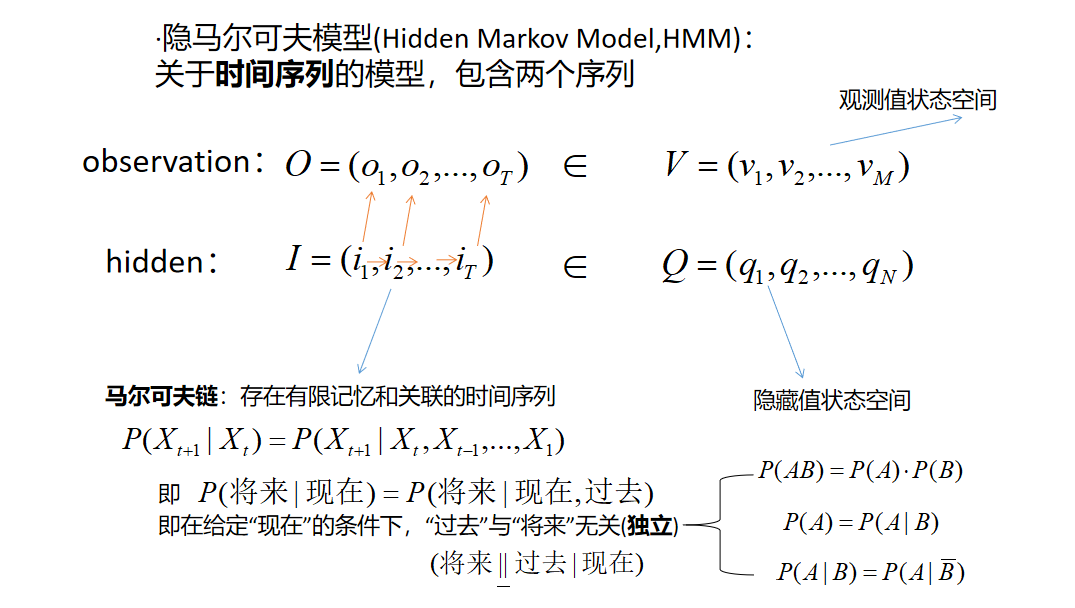


# 隐马尔可夫模型的两个基本假设
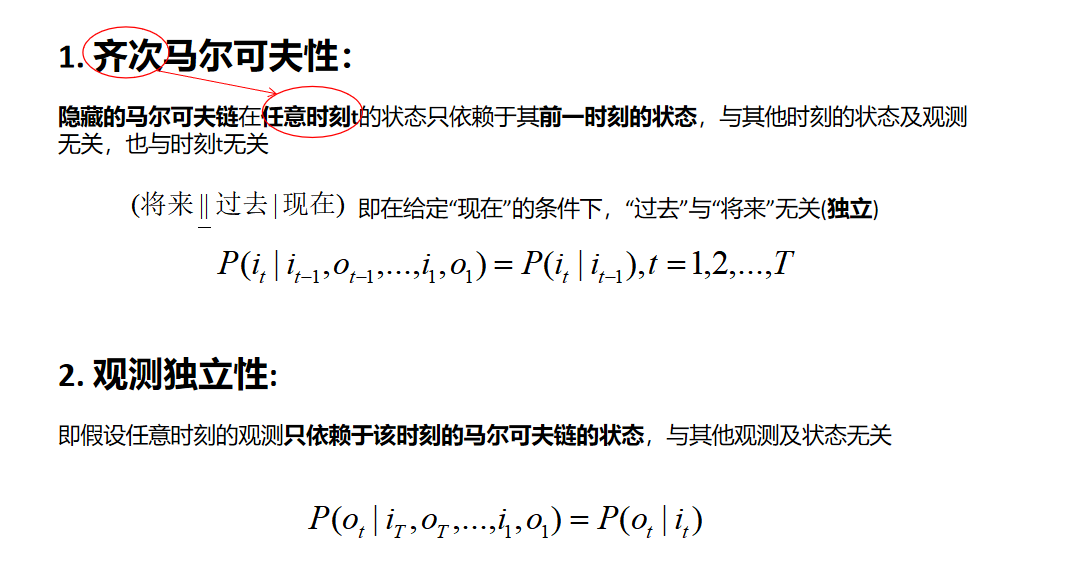


# 隐马尔可夫链三要素
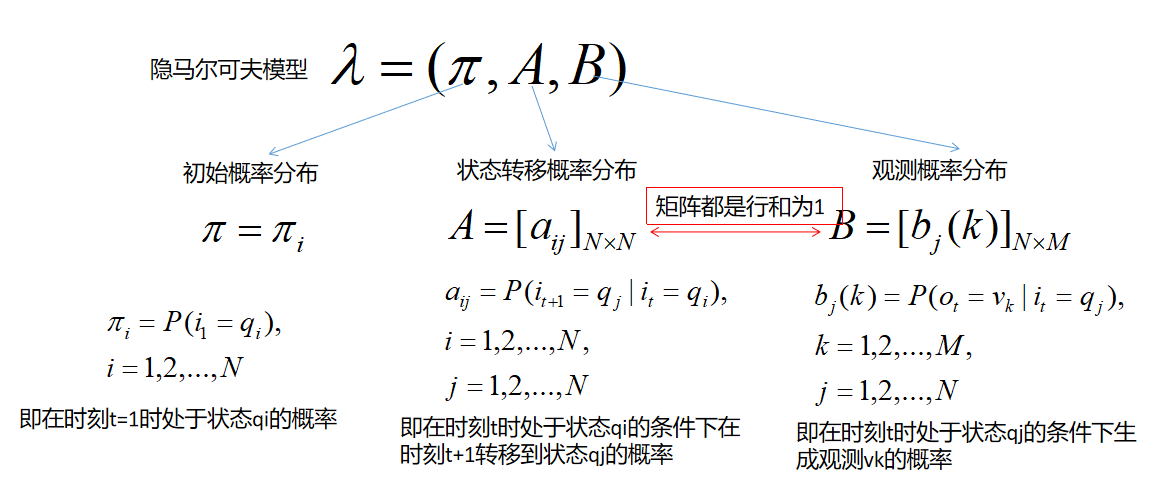


* ## 实际问题理解三要素

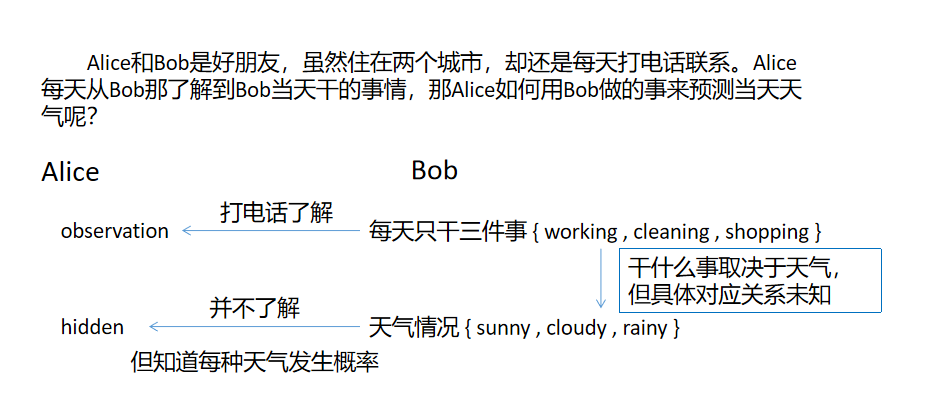
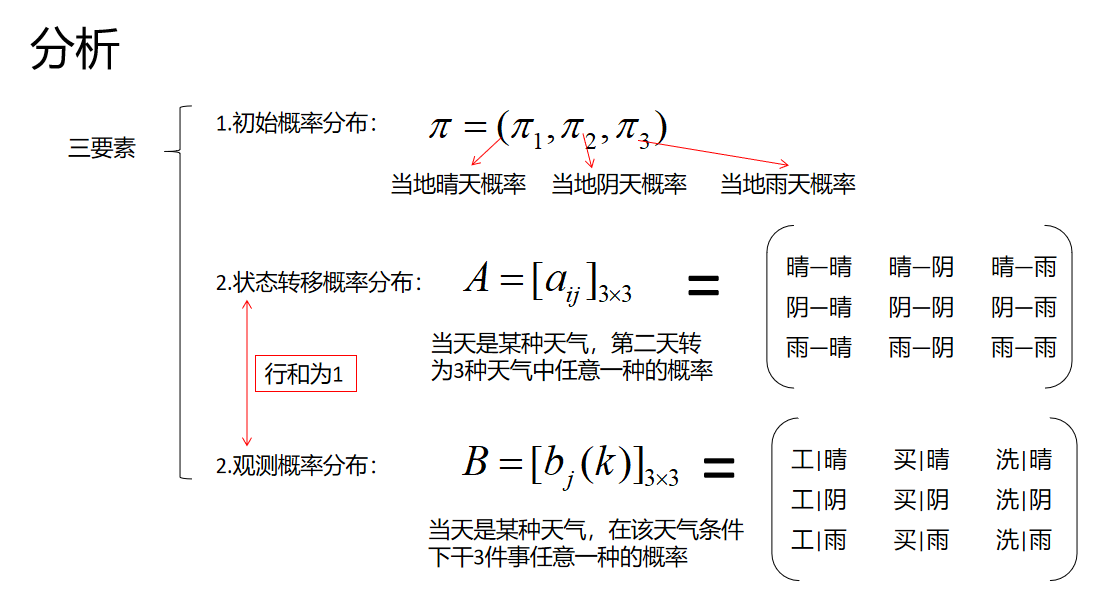

# 隐马尔可夫链三个基本问题
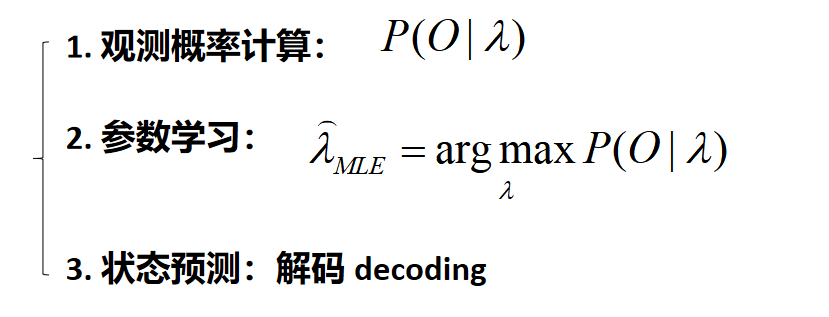

# 观测概率计算
* ## 直接计算法：（计算量大）
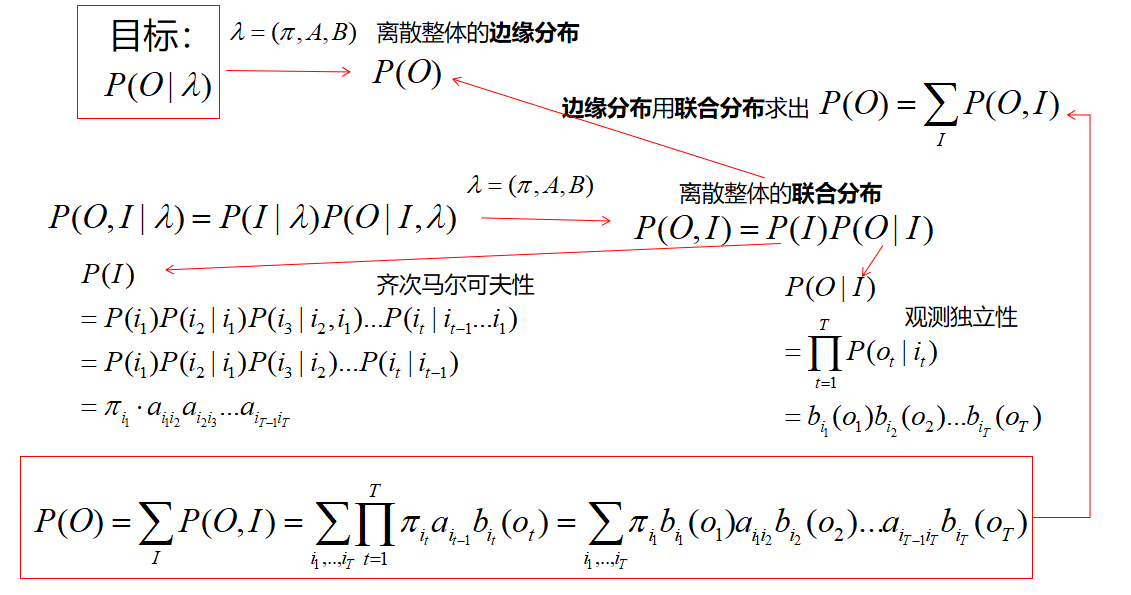

* ## 前向算法
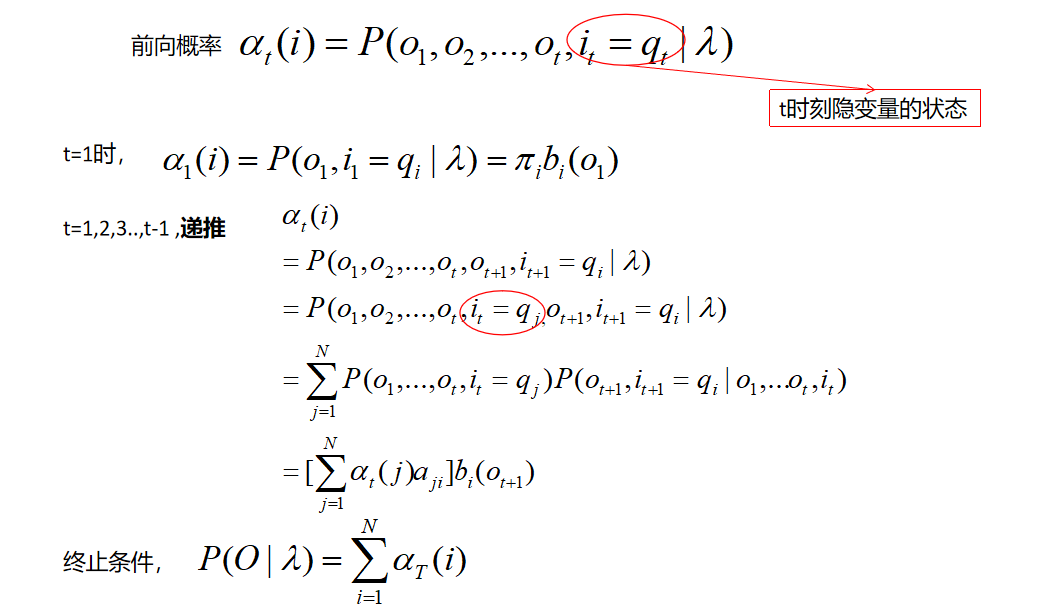

# 参数学习

EM 算法

# 状态预测

维特比算法（动态规划）

# 李航习题10.1和python实现
&emsp;&emsp;给定盒子和球组成的隐马尔可夫模型$\lambda=(A,B,\pi)$，其中，$$A=\left[\begin{array}{ccc}0.5&0.2&0.3\\0.3&0.5&0.2\\0.2&0.3&0.5\end{array}\right], \quad B=\left[\begin{array}{cc}0.5&0.5\\0.4&0.6\\0.7&0.3\end{array}\right], \quad \pi=(0.2,0.4,0.4)^T$$设$T=4,O=(红,白,红,白)$，试用后向算法计算$P(O|\lambda)$。

In [2]:
import numpy as np

class HiddenMarkov:
    def __init__(self):
        self.alphas = None
        self.forward_P = None
        self.betas = None
        self.backward_P = None

    # 前向算法
    def forward(self, Q, V, A, B, O, PI):
        # 状态序列的大小
        N = len(Q)
        # 观测序列的大小
        M = len(O)
        # 初始化前向概率alpha值
        alphas = np.zeros((N, M))
        # 时刻数=观测序列数
        T = M
        # 遍历每一个时刻，计算前向概率alpha值
        for t in range(T):
            # 得到序列对应的索引
            indexOfO = V.index(O[t])
            # 遍历状态序列
            for i in range(N):
                # 初始化alpha初值
                if t == 0:
                    # P176 公式(10.15)
                    alphas[i][t] = PI[t][i] * B[i][indexOfO]
                    print('alpha1(%d) = p%db%db(o1) = %f' %
                          (i + 1, i, i, alphas[i][t]))
                else:
                    # P176 公式(10.16)
                    alphas[i][t] = np.dot([alpha[t - 1] for alpha in alphas],
                                          [a[i] for a in A]) * B[i][indexOfO]
                    print('alpha%d(%d) = [sigma alpha%d(i)ai%d]b%d(o%d) = %f' %
                          (t + 1, i + 1, t - 1, i, i, t, alphas[i][t]))
        # P176 公式(10.17)
        self.forward_P = np.sum([alpha[M - 1] for alpha in alphas])
        self.alphas = alphas

    # 后向算法
    def backward(self, Q, V, A, B, O, PI):
        # 状态序列的大小
        N = len(Q)
        # 观测序列的大小
        M = len(O)
        # 初始化后向概率beta值，P178 公式(10.19)
        betas = np.ones((N, M))
        #
        for i in range(N):
            print('beta%d(%d) = 1' % (M, i + 1))
        # 对观测序列逆向遍历
        for t in range(M - 2, -1, -1):
            # 得到序列对应的索引
            indexOfO = V.index(O[t + 1])
            # 遍历状态序列
            for i in range(N):
                # P178 公式(10.20)
                betas[i][t] = np.dot(
                    np.multiply(A[i], [b[indexOfO] for b in B]),
                    [beta[t + 1] for beta in betas])
                realT = t + 1
                realI = i + 1
                print('beta%d(%d) = sigma[a%djbj(o%d)beta%d(j)] = (' %
                      (realT, realI, realI, realT + 1, realT + 1),
                      end='')
                for j in range(N):
                    print("%.2f * %.2f * %.2f + " %
                          (A[i][j], B[j][indexOfO], betas[j][t + 1]),
                          end='')
                print("0) = %.3f" % betas[i][t])
        # 取出第一个值
        indexOfO = V.index(O[0])
        self.betas = betas
        # P178 公式(10.21)
        P = np.dot(np.multiply(PI, [b[indexOfO] for b in B]),
                   [beta[0] for beta in betas])
        self.backward_P = P
        print("P(O|lambda) = ", end="")
        for i in range(N):
            print("%.1f * %.1f * %.5f + " %
                  (PI[0][i], B[i][indexOfO], betas[i][0]),
                  end="")
        print("0 = %f" % P)

    # 维特比算法
    def viterbi(self, Q, V, A, B, O, PI):
        # 状态序列的大小
        N = len(Q)
        # 观测序列的大小
        M = len(O)
        # 初始化daltas
        deltas = np.zeros((N, M))
        # 初始化psis
        psis = np.zeros((N, M))
        # 初始化最优路径矩阵，该矩阵维度与观测序列维度相同
        I = np.zeros((1, M))
        # 遍历观测序列
        for t in range(M):
            # 递推从t=2开始
            realT = t + 1
            # 得到序列对应的索引
            indexOfO = V.index(O[t])
            for i in range(N):
                realI = i + 1
                if t == 0:
                    # P185 算法10.5 步骤(1)
                    deltas[i][t] = PI[0][i] * B[i][indexOfO]
                    psis[i][t] = 0
                    print('delta1(%d) = pi%d * b%d(o1) = %.2f * %.2f = %.2f' %
                          (realI, realI, realI, PI[0][i], B[i][indexOfO],
                           deltas[i][t]))
                    print('psis1(%d) = 0' % (realI))
                else:
                    # # P185 算法10.5 步骤(2)
                    deltas[i][t] = np.max(
                        np.multiply([delta[t - 1] for delta in deltas],
                                    [a[i] for a in A])) * B[i][indexOfO]
                    print(
                        'delta%d(%d) = max[delta%d(j)aj%d]b%d(o%d) = %.2f * %.2f = %.5f'
                        % (realT, realI, realT - 1, realI, realI, realT,
                           np.max(
                               np.multiply([delta[t - 1] for delta in deltas],
                                           [a[i] for a in A])), B[i][indexOfO],
                           deltas[i][t]))
                    psis[i][t] = np.argmax(
                        np.multiply([delta[t - 1] for delta in deltas],
                                    [a[i] for a in A]))
                    print('psis%d(%d) = argmax[delta%d(j)aj%d] = %d' %
                          (realT, realI, realT - 1, realI, psis[i][t]))
        #print(deltas)
        #print(psis)
        # 得到最优路径的终结点
        I[0][M - 1] = np.argmax([delta[M - 1] for delta in deltas])
        print('i%d = argmax[deltaT(i)] = %d' % (M, I[0][M - 1] + 1))
        # 递归由后向前得到其他结点
        for t in range(M - 2, -1, -1):
            I[0][t] = psis[int(I[0][t + 1])][t + 1]
            print('i%d = psis%d(i%d) = %d' %
                  (t + 1, t + 2, t + 2, I[0][t] + 1))
        # 输出最优路径
        print('最优路径是：', "->".join([str(int(i + 1)) for i in I[0]]))

In [3]:
#习题10.1
Q = [1, 2, 3]
V = ['红', '白']
A = [[0.5, 0.2, 0.3], [0.3, 0.5, 0.2], [0.2, 0.3, 0.5]]
B = [[0.5, 0.5], [0.4, 0.6], [0.7, 0.3]]
# O = ['红', '白', '红', '红', '白', '红', '白', '白']
O = ['红', '白', '红', '白']    #习题10.1的例子
PI = [[0.2, 0.4, 0.4]]

HMM = HiddenMarkov()
# HMM.forward(Q, V, A, B, O, PI)
# HMM.backward(Q, V, A, B, O, PI)
HMM.viterbi(Q, V, A, B, O, PI)

delta1(1) = pi1 * b1(o1) = 0.20 * 0.50 = 0.10
psis1(1) = 0
delta1(2) = pi2 * b2(o1) = 0.40 * 0.40 = 0.16
psis1(2) = 0
delta1(3) = pi3 * b3(o1) = 0.40 * 0.70 = 0.28
psis1(3) = 0
delta2(1) = max[delta1(j)aj1]b1(o2) = 0.06 * 0.50 = 0.02800
psis2(1) = argmax[delta1(j)aj1] = 2
delta2(2) = max[delta1(j)aj2]b2(o2) = 0.08 * 0.60 = 0.05040
psis2(2) = argmax[delta1(j)aj2] = 2
delta2(3) = max[delta1(j)aj3]b3(o2) = 0.14 * 0.30 = 0.04200
psis2(3) = argmax[delta1(j)aj3] = 2
delta3(1) = max[delta2(j)aj1]b1(o3) = 0.02 * 0.50 = 0.00756
psis3(1) = argmax[delta2(j)aj1] = 1
delta3(2) = max[delta2(j)aj2]b2(o3) = 0.03 * 0.40 = 0.01008
psis3(2) = argmax[delta2(j)aj2] = 1
delta3(3) = max[delta2(j)aj3]b3(o3) = 0.02 * 0.70 = 0.01470
psis3(3) = argmax[delta2(j)aj3] = 2
delta4(1) = max[delta3(j)aj1]b1(o4) = 0.00 * 0.50 = 0.00189
psis4(1) = argmax[delta3(j)aj1] = 0
delta4(2) = max[delta3(j)aj2]b2(o4) = 0.01 * 0.60 = 0.00302
psis4(2) = argmax[delta3(j)aj2] = 1
delta4(3) = max[delta3(j)aj3]b3(o4) = 0.01 * 0.30 = 0.0

# 李航习题10.2和python实现（自编HMM函数同上）

&emsp;&emsp;给定盒子和球组成的隐马尔可夫模型$\lambda=(A,B,\pi)$，其中，$$A=\left[\begin{array}{ccc}0.5&0.1&0.4\\0.3&0.5&0.2\\0.2&0.2&0.6\end{array}\right], \quad B=\left[\begin{array}{cc}0.5&0.5\\0.4&0.6\\0.7&0.3\end{array}\right], \quad \pi=(0.2,0.3,0.5)^T$$设$T=8,O=(红,白,红,红,白,红,白,白)$，试用前向后向概率计算$P(i_4=q_3|O,\lambda)$

In [4]:
Q = [1, 2, 3]
V = ['红', '白']
A = [[0.5, 0.2, 0.3], [0.3, 0.5, 0.2], [0.2, 0.3, 0.5]]
B = [[0.5, 0.5], [0.4, 0.6], [0.7, 0.3]]
O = ['红', '白', '红', '红', '白', '红', '白', '白']
PI = [[0.2, 0.3, 0.5]]

HMM.forward(Q, V, A, B, O, PI)
HMM.backward(Q, V, A, B, O, PI)

alpha1(1) = p0b0b(o1) = 0.100000
alpha1(2) = p1b1b(o1) = 0.120000
alpha1(3) = p2b2b(o1) = 0.350000
alpha2(1) = [sigma alpha0(i)ai0]b0(o1) = 0.078000
alpha2(2) = [sigma alpha0(i)ai1]b1(o1) = 0.111000
alpha2(3) = [sigma alpha0(i)ai2]b2(o1) = 0.068700
alpha3(1) = [sigma alpha1(i)ai0]b0(o2) = 0.043020
alpha3(2) = [sigma alpha1(i)ai1]b1(o2) = 0.036684
alpha3(3) = [sigma alpha1(i)ai2]b2(o2) = 0.055965
alpha4(1) = [sigma alpha2(i)ai0]b0(o3) = 0.021854
alpha4(2) = [sigma alpha2(i)ai1]b1(o3) = 0.017494
alpha4(3) = [sigma alpha2(i)ai2]b2(o3) = 0.033758
alpha5(1) = [sigma alpha3(i)ai0]b0(o4) = 0.011463
alpha5(2) = [sigma alpha3(i)ai1]b1(o4) = 0.013947
alpha5(3) = [sigma alpha3(i)ai2]b2(o4) = 0.008080
alpha6(1) = [sigma alpha4(i)ai0]b0(o5) = 0.005766
alpha6(2) = [sigma alpha4(i)ai1]b1(o5) = 0.004676
alpha6(3) = [sigma alpha4(i)ai2]b2(o5) = 0.007188
alpha7(1) = [sigma alpha5(i)ai0]b0(o6) = 0.002862
alpha7(2) = [sigma alpha5(i)ai1]b1(o6) = 0.003389
alpha7(3) = [sigma alpha5(i)ai2]b2(o6) = 0.001878
a

可知，$\displaystyle P(i_4=q_3|O,\lambda)=\frac{P(i_4=q_3,O|\lambda)}{P(O|\lambda)}=\frac{\alpha_4(3)\beta_4(3)}{P(O|\lambda)}$

In [5]:
print("alpha4(3)=", HMM.alphas[3 - 1][4 - 1])
print("beta4(3)=", HMM.betas[3 - 1][4 - 1])
print("P(O|lambda)=", HMM.backward_P[0])
result = (HMM.alphas[3 - 1][4 - 1] *
          HMM.betas[3 - 1][4 - 1]) / HMM.backward_P[0]
print("P(i4=q3|O,lambda) =", result)

alpha4(3)= 0.033757709999999996
beta4(3)= 0.049728909999999994
P(O|lambda)= 0.0038519735794910986
P(i4=q3|O,lambda) = 0.4358114321796269


# 李航习题10.3和python实现
&emsp;&emsp;在习题10.1中，试用维特比算法求最优路径$I^*=(i_1^*,i_2^*,i_3^*,i_4^*)$。

In [6]:
Q = [1, 2, 3]
V = ['红', '白']
A = [[0.5, 0.2, 0.3], [0.3, 0.5, 0.2], [0.2, 0.3, 0.5]]
B = [[0.5, 0.5], [0.4, 0.6], [0.7, 0.3]]
O = ['红', '白', '红', '白']
PI = [[0.2, 0.4, 0.4]]

HMM = HiddenMarkov()
HMM.viterbi(Q, V, A, B, O, PI)

delta1(1) = pi1 * b1(o1) = 0.20 * 0.50 = 0.10
psis1(1) = 0
delta1(2) = pi2 * b2(o1) = 0.40 * 0.40 = 0.16
psis1(2) = 0
delta1(3) = pi3 * b3(o1) = 0.40 * 0.70 = 0.28
psis1(3) = 0
delta2(1) = max[delta1(j)aj1]b1(o2) = 0.06 * 0.50 = 0.02800
psis2(1) = argmax[delta1(j)aj1] = 2
delta2(2) = max[delta1(j)aj2]b2(o2) = 0.08 * 0.60 = 0.05040
psis2(2) = argmax[delta1(j)aj2] = 2
delta2(3) = max[delta1(j)aj3]b3(o2) = 0.14 * 0.30 = 0.04200
psis2(3) = argmax[delta1(j)aj3] = 2
delta3(1) = max[delta2(j)aj1]b1(o3) = 0.02 * 0.50 = 0.00756
psis3(1) = argmax[delta2(j)aj1] = 1
delta3(2) = max[delta2(j)aj2]b2(o3) = 0.03 * 0.40 = 0.01008
psis3(2) = argmax[delta2(j)aj2] = 1
delta3(3) = max[delta2(j)aj3]b3(o3) = 0.02 * 0.70 = 0.01470
psis3(3) = argmax[delta2(j)aj3] = 2
delta4(1) = max[delta3(j)aj1]b1(o4) = 0.00 * 0.50 = 0.00189
psis4(1) = argmax[delta3(j)aj1] = 0
delta4(2) = max[delta3(j)aj2]b2(o4) = 0.01 * 0.60 = 0.00302
psis4(2) = argmax[delta3(j)aj2] = 1
delta4(3) = max[delta3(j)aj3]b3(o4) = 0.01 * 0.30 = 0.0